# Windowing and Welch's method

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  del sys.path[0]


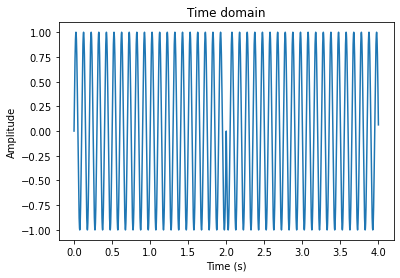

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


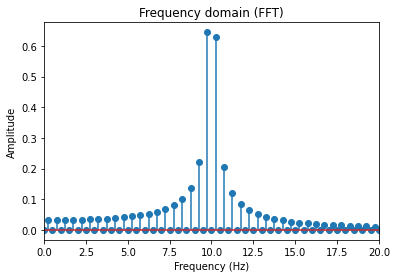

In [3]:
# create signal
srate = 1000
npnts = 2000 # actually, this times 2!
time  = np.arange(0,npnts*2)/srate
freq  = 10 # Hz

# create signal (each part separately)
sigP1  = np.sin(2*np.pi*freq*time[0:npnts])
sigP2  = np.sin(2*np.pi*freq*time[0:npnts] + np.pi) #Nearly identical 
signal = np.concatenate((sigP1,sigP2),axis=0)

# compute its amplitude spectrum
hz = np.linspace(0,srate/2,num=int(np.floor(len(time)/2)+1))
ampspect = np.abs(scipy.fft(signal)/len(time))
ampspect = 2*ampspect[0:len(hz)]


# plot the time-domain signal
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

# plot the frequency domain signal
plt.stem(hz,ampspect)
plt.xlim(0,freq*2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain (FFT)')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


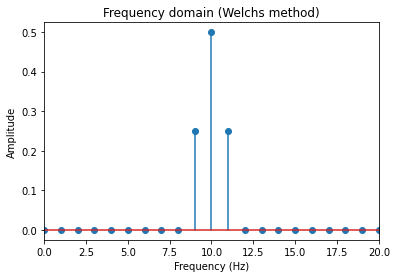

In [4]:
# Now for Welch's method

# parameters
winlen = 1000 # window length in points (not ms!)
nbins  = np.floor(len(time)/winlen)

# vector of frequencies for the small windows
hzL = np.linspace(0,srate/2,int(np.floor(winlen/2)+1))

# initialize time-frequency matrix
welchspect = np.zeros(len(hzL))

# Hann taper
hwin = .5*(1-np.cos(2*np.pi*(np.arange(0,winlen)) / (winlen-1)))

# loop over time windows
for ti in range(0,int(nbins)):
    
    # extract part of the signal
    tidx    = range( (ti-1)*winlen+1 , ti*winlen+1 )
    tmpdata = signal[tidx]
    
    # FFT of these data (does the taper help?)
    x = scipy.fft(hwin*tmpdata)/winlen
    
    # and put in matrix
    welchspect = welchspect + 2*np.abs(x[0:len(hzL)])

# divide by nbins to complete average
welchspect = welchspect/nbins


# and plot
plt.stem(hzL,welchspect)
plt.xlim(0,freq*2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain (Welch''s method)')
plt.show()